# Data Analysis

## Set Up

In [25]:
import numpy as np
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from scipy import stats

In [8]:
aita_df = pd.read_csv('../data/aita_data.csv')

To prevent clutter and to maintain a clean version of the DataFrame in case I need to revert, I will be doing my analysis on a copy of the corpus. If something might be useful in the future, I will add that column to analysis_df. But, if it's likely bound to the analysis only in one section, I will make another DataFrame for that aside.

In [9]:
analysis_df = aita_df.copy()

Checking to see if it populated properly:

In [10]:
analysis_df.head()

,Unnamed: 0,AuthorID,Title,Text,Ruling,CommentCount,Score,UpvoteRatio
0,0,1,AITA for sleeping during the day?,"I honestly thought what I was doing was fine, ...",Not the A-hole,34,7,0.82
1,2,0,AITAH for refusing to change out of my semi-se...,My boyfriend was FaceTiming his cousin and his...,Not the A-hole,23,8,0.78
2,6,2,AITA for not helping my neighbor?,I (M26) live in a large apartment complex with...,Not the A-hole,253,1016,0.97
3,9,3,AITA for threatening to lock my housemate's wi...,I'll keep it short; my housemate moved in arou...,Everyone Sucks,34,4,0.76
4,25,4,AITA for allowing my bio dad and his wife to b...,I found out that I am pregnant about 5 1/2 mon...,Not the A-hole,62,46,0.88


In [11]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9414 entries, 0 to 9413
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9414 non-null   int64  
 1   AuthorID      9414 non-null   int64  
 2   Title         9414 non-null   object 
 3   Text          9414 non-null   object 
 4   Ruling        9414 non-null   object 
 5   CommentCount  9414 non-null   int64  
 6   Score         9414 non-null   int64  
 7   UpvoteRatio   9414 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 588.5+ KB


Let's look at the breakdown of rulings:

In [12]:
analysis_df.Ruling.value_counts()

Not the A-hole     7180
Asshole            1399
No A-holes here     471
Everyone Sucks      364
Name: Ruling, dtype: int64

In [ ]:
rulings_graph = analysis_df.Ruling.value_counts().plot(kind='barh')
plt.show()

A vast majority of rulings believe that the poster is not the asshole. There's significantly less data for all the other rulings, but especially No Assholes here and Everyone Sucks Here. This makes sense, as the premise of the subreddit emphasizes the binary of were you good or bad in a situation, so the two more nuanced rulings have less usage.

## Question: How much context and justification do the posters give?

### Practically: How does post length vary between rulings?

Based on the subreddit's [Rules](https://www.reddit.com/r/AmItheAsshole/about/rules/), posts are limited to 3000 characters. However, not every story needs to take up that entire length to be told. Is there any meaningful variance between the overall post lengths of the four rulings? I could imagine that people trying to shake the blame off themselves would spend more time trying to justify their actions.

In [13]:
analysis_df["Tokens"] = analysis_df.Text.map(nltk.word_tokenize)
analysis_df["TokenCount"] = analysis_df.Tokens.map(lambda x: len(x))
analysis_df["Sentences"] = analysis_df.Text.map(nltk.sent_tokenize)

In [14]:
tokencount_compare = analysis_df.groupby("Ruling")["TokenCount"].mean()
tokencount_compare = tokencount_compare.to_frame()
print(tokencount_compare)

                 TokenCount
Ruling                     
Asshole          421.760543
Everyone Sucks   478.607143
No A-holes here  383.898089
Not the A-hole   445.821866


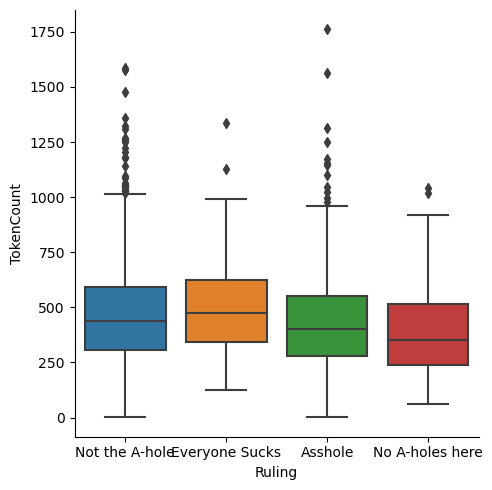

In [27]:
sns.catplot(x="Ruling", y="TokenCount", data=analysis_df, kind="box")
plt.show()

This data shows that writers declared as Not the Asshole actually write the most on average. Perhaps this could imply that, instead of being perceived as trying to over-justify their actions, some writing more simply provides a higher amount of context that allows readers to actually understand their position. Conversely, perhaps the low token count on No Assholes Here shows that there's not enough of a story being told to justify a ruling. Or, that a situation in itself is so small that you shouldn't even have to worry about it.

Writers declared as Assholes seem to have the widest variance in how long each post is. This might suggest what I came into this test hypothesizing: that readers would be able to detect someone who is trying to overcompensate for their actions. This might also be attributed to a variety of other causes, though. Maybe these situations might just need much more context to explain the situation.

In [ ]:
yta = analysis_df[analysis_df.Ruling == "Asshole"].TokenCount.mean()
nta = analysis_df[analysis_df.Ruling == "Not the A-hole"].TokenCount.mean()
nah = analysis_df[analysis_df.Ruling == "No A-holes here"].TokenCount.mean()
esh = analysis_df[analysis_df.Ruling == "Everyone Sucks"].TokenCount.mean()

stats.f_oneway(yta, nta, nah, esh)

I'll also consider the length of the post title, as that's the first first impression people will have on the subject.

In [19]:
analysis_df["TitleTokens"] = analysis_df.Title.map(nltk.word_tokenize)
analysis_df["TitleTkCount"] = analysis_df.TitleTokens.map(lambda x: len(x))

In [20]:
tokencount_compare = analysis_df.groupby("Ruling")["TitleTkCount"].mean()
tokencount_compare = tokencount_compare.to_frame()
print(tokencount_compare)

                 TitleTkCount
Ruling                       
Asshole             13.383846
Everyone Sucks      12.618132
No A-holes here     12.600849
Not the A-hole      12.881894


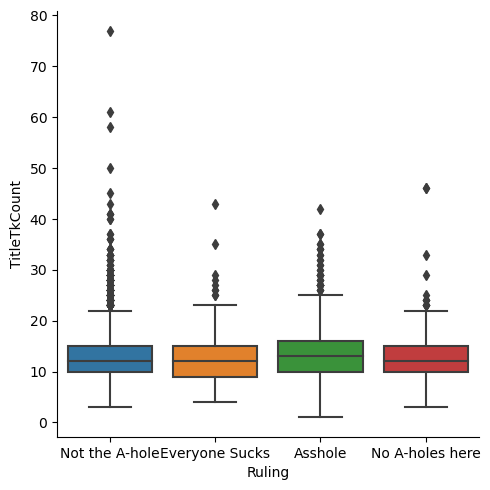

In [28]:
sns.catplot(x="Ruling", y="TitleTkCount", data=analysis_df, kind="box")
plt.show()

It makes sense that the differences between them are so minimal, since there's a strict limit of 300 characters on any Reddit post. Visually, is also seems that there's so much variance in how many words are used that it's not very meaningful to analyze.

In [ ]:
yta = analysis_df[analysis_df.Ruling == "Asshole"].TitleTkCount.mean()
nta = analysis_df[analysis_df.Ruling == "Not the A-hole"].TitleTkCount.mean()
nah = analysis_df[analysis_df.Ruling == "No A-holes here"].TitleTkCount.mean()
esh = analysis_df[analysis_df.Ruling == "Everyone Sucks"].TitleTkCount.mean()

stats.f_oneway(yta, nta, nah, esh)

## Question: Who do their stories focalize?

### Practically: Do the most common subjects of sentences vary between rulings?

In [29]:
nlp = spacy.load('en_core_web_sm')

In [30]:
analysis_df["SpacyText"] = analysis_df["Sentences"].apply(lambda x: [nlp(sent) for sent in x])

subjects_df = analysis_df.copy()
subjects_df["Subjects"] = subjects_df["SpacyText"].apply(lambda x: [[tok for tok in sent if (tok.dep_ == "nsubj")] for sent in x])
# This is an array of arrays, I want to unpack into just 1 array per cell
subjects_df["Subjects"] = subjects_df.Subjects.map(lambda x: sum(x, []))

subjects_df.head(10)

,Unnamed: 0,AuthorID,Title,Text,Ruling,CommentCount,Score,UpvoteRatio,Tokens,TokenCount,Sentences,TitleTokens,TitleTkCount,SpacyText,Subjects
0,0,1,AITA for sleeping during the day?,"I honestly thought what I was doing was fine, ...",Not the A-hole,34,7,0.82,"[I, honestly, thought, what, I, was, doing, wa...",204,"[I honestly thought what I was doing was fine,...","[AITA, for, sleeping, during, the, day, ?]",7,"[(I, honestly, thought, what, I, was, doing, w...","[I, I, dad, I, I, I, I, I, editors, I, they, I..."
1,2,0,AITAH for refusing to change out of my semi-se...,My boyfriend was FaceTiming his cousin and his...,Not the A-hole,23,8,0.78,"[My, boyfriend, was, FaceTiming, his, cousin, ...",339,[My boyfriend was FaceTiming his cousin and hi...,"[AITAH, for, refusing, to, change, out, of, my...",13,"[(My, boyfriend, was, FaceTiming, his, cousin,...","[boyfriend, They, I, I, I, it, I, I, He, you, ..."
2,6,2,AITA for not helping my neighbor?,I (M26) live in a large apartment complex with...,Not the A-hole,253,1016,0.97,"[I, (, M26, ), live, in, a, large, apartment, ...",570,[I (M26) live in a large apartment complex wit...,"[AITA, for, not, helping, my, neighbor, ?]",7,"[(I, (, M26, ), live, in, a, large, apartment,...","[I, I, which, It, I, I, units, That, I, guy, d..."
3,9,3,AITA for threatening to lock my housemate's wi...,I'll keep it short; my housemate moved in arou...,Everyone Sucks,34,4,0.76,"[I, 'll, keep, it, short, ;, my, housemate, mo...",390,[I'll keep it short; my housemate moved in aro...,"[AITA, for, threatening, to, lock, my, housema...",15,"[(I, 'll, keep, it, short, ;, my, housemate, m...","[I, housemate, he, that, I, he, he, I, he, tha..."
4,25,4,AITA for allowing my bio dad and his wife to b...,I found out that I am pregnant about 5 1/2 mon...,Not the A-hole,62,46,0.88,"[I, found, out, that, I, am, pregnant, about, ...",408,[I found out that I am pregnant about 5 1/2 mo...,"[AITA, for, allowing, my, bio, dad, and, his, ...",16,"[(I, found, out, that, I, am, pregnant, about,...","[I, I, I, mom, she, she, I, who, some, I, I, i..."
5,29,5,WIBTA for confronting my dad about skipping Ch...,My (31F) parents (55F) and (63M) have been sep...,Not the A-hole,20,3,0.81,"[My, (, 31F, ), parents, (, 55F, ), and, (, 63...",583,[My (31F) parents (55F) and (63M) have been se...,"[WIBTA, for, confronting, my, dad, about, skip...",8,"[(My, (, 31F, ), parents, (, 55F, ), and, (, 6...","[I, they, It, I, I, I, husband, that, I, we, w..."
6,39,6,WIBTA if on a day trip with friends I opt out ...,I (26F) live in the US and my friend from anot...,Not the A-hole,10,8,1.00,"[I, (, 26F, ), live, in, the, US, and, my, fri...",260,[I (26F) live in the US and my friend from ano...,"[WIBTA, if, on, a, day, trip, with, friends, I...",16,"[(I, (, 26F, ), live, in, the, US, and, my, fr...","[I, We, Her, She, I, it, we, she, She, activit..."
7,41,7,WIBTA for not celebrating Christmas with my bo...,**edit #1**: Nancy is hosting Christmas dinner...,Not the A-hole,12,3,0.80,"[*, *, edit, #, 1, *, *, :, Nancy, is, hosting...",336,[**edit #1**: Nancy is hosting Christmas dinne...,"[WIBTA, for, not, celebrating, Christmas, with...",16,"[(*, *, edit, #, 1, *, *, :, Nancy, is, hostin...","[Nancy, it, Andy, Christmas, it, we, we, Walt,..."
8,42,8,AITA for being annoyed that my friend is visit...,I (38f) have two friends from university: Sue ...,Asshole,27,3,0.58,"[I, (, 38f, ), have, two, friends, from, unive...",604,[I (38f) have two friends from university: Sue...,"[AITA, for, being, annoyed, that, my, friend, ...",15,"[(I, (, 38f, ), have, two, friends, from, univ...","[I, Sue, Meg, I, we, I, I, I, I, I, summer, Me..."
9,46,9,AITA for getting upset when my roommate’s part...,Keeping this anon cause I’m not trying to put ...,Not the A-hole,277,2914,0.97,"[Keeping, this, anon, cause, I, ’, m, not, try...",311,[Keeping this anon cause I’m not trying to put...,"[AITA, for, getting, upset, when, my, roommate...",15,"[(Keeping, this, anon, cause, I, ’m, n

In [59]:
def count_subjects_per_ruling(ruling, number):
    ruling_subjects = subjects_df[subjects_df.Ruling == ruling].Subjects.tolist()
    subjects_count = {}
    for arr in ruling_subjects:
        for subj in arr:
            subjects_count[str(subj)] = subjects_count.get(str(subj), 0) + 1
    
    sort_subjects = sorted(subjects_count.items(), key=lambda x:x[1], reverse=True)
    subjects_count = dict(sort_subjects)
    top_subjects = {i: subjects_count[i] for i in list(subjects_count)[:number]}
    return top_subjects

In [60]:
nah = count_subjects_per_ruling("Not the A-hole", 10)
print(nah)

{'I': 124908, 'she': 30099, 'he': 24320, 'it': 18108, 'we': 16388, 'they': 12251, 'She': 8802, 'i': 8036, 'He': 6711, 'that': 6090}


In [61]:
yta = count_subjects_per_ruling("Asshole", 10)
print(nah)

{'I': 124908, 'she': 30099, 'he': 24320, 'it': 18108, 'we': 16388, 'they': 12251, 'She': 8802, 'i': 8036, 'He': 6711, 'that': 6090}


## Question: How much agency does the writer express?

### Practically: What proportion of sentences is written in passive voice?